## Линейные модели, SVM и деревья решений.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('D:/ТМО/titanic.csv')

In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('Размер датасета:', dataset.shape[0], 'x', dataset.shape[1])

Размер датасета: 891 x 12


### Кодирование категориальных признаков

Заменим значения стобца Sex на числовые

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
new_column = ord_enc.fit_transform(dataset[['Sex']])
dataset = dataset.drop(columns=['Sex'], axis=1)
dataset['Sex'] = new_column + 1
dataset['Sex'] = dataset['Sex'].astype(np.integer)
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,2


Таким образом, male = 2, female = 1

### Удаление лишних данных

Удалим столбец имён

In [7]:
dataset = dataset.drop(columns=['Name'], axis=1)
dataset.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,2


### Обучающая и тестовая выборки

In [8]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)

In [9]:
data_train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
6,7,0,1,54.0,0,0,17463,51.8625,E46,S,2
718,719,0,3,NaN,0,0,36568,15.5000,NaN,Q,2
685,686,0,2,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,2
73,74,0,3,26.0,1,0,2680,14.4542,NaN,C,2
882,883,0,3,22.0,0,0,7552,10.5167,NaN,S,1


In [10]:
print('Размер обучающей выборки:', data_train.shape[0], 'x', data_train.shape[1])

Размер обучающей выборки: 596 x 11


In [11]:
data_test.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
709,710,1,3,NaN,1,1,2661,15.2458,NaN,C,2
439,440,0,2,31.0,0,0,C.A. 18723,10.5000,NaN,S,2
840,841,0,3,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,2
720,721,1,2,6.0,0,1,248727,33.0000,NaN,S,1
39,40,1,3,14.0,1,0,2651,11.2417,NaN,C,1


In [12]:
print('Размер тестовой выборки:', data_test.shape[0], 'x', data_test.shape[1])

Размер тестовой выборки: 295 x 11


### Дерево решений

[Text(0.5, 0.875, 'x[0] <= 1.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3, 0.625, 'x[1] <= 2.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.2, 0.375, 'x[1] <= 1.5\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.1, 0.125, 'gini = 0.097\nsamples = 59\nvalue = [3, 56]'),
 Text(0.3, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.4, 0.375, 'gini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(0.7, 0.625, 'x[1] <= 1.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.6, 0.375, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(0.8, 0.375, 'x[1] <= 2.5\ngini = 0.263\nsamples = 314\nvalue = [265, 49]'),
 Text(0.7, 0.125, 'gini = 0.298\nsamples = 77\nvalue = [63, 14]'),
 Text(0.9, 0.125, 'gini = 0.252\nsamples = 237\nvalue = [202, 35]')]

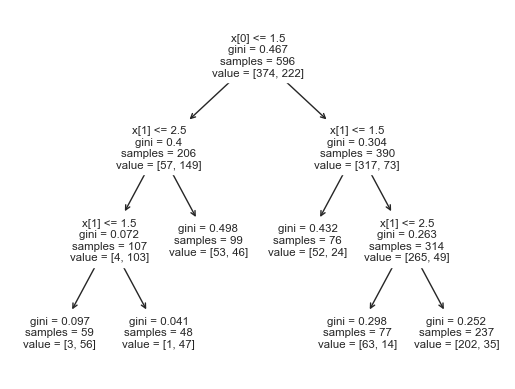

In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_train[['Sex', 'Pclass']], data_train['Survived'])
clf.predict(data_test[['Sex', 'Pclass']])

tree.plot_tree(clf) 

### SVM

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = data_train[['Sex', 'Pclass']]
y = data_train[['Survived']].values.ravel()
clf = SVC(C=1.0, kernel='linear').fit(X, y)
predict_survived = clf.predict(data_test[['Sex', 'Pclass']])
print(predict_survived)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0]


C:\Users\dimat\AppData\Local\Temp\ipykernel_19420\3139424502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_dataset['Survived'] = predict_survived


<Axes: xlabel='Sex', ylabel='Pclass'>

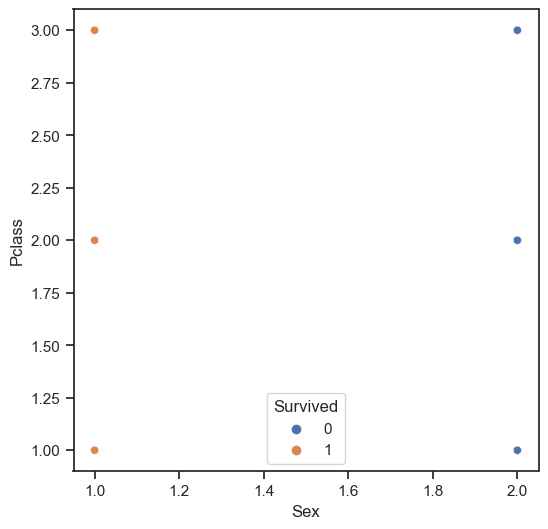

In [15]:
classified_dataset = data_test[['Sex', 'Pclass']]
classified_dataset['Survived'] = predict_survived


fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x='Sex', y='Pclass', data=classified_dataset, hue='Survived')

In [16]:
sex = [1.0, 2.0]
survived_pclass1sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 1.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass1sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 1.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass1sex1.shape[0], survived_pclass1sex2.shape[0]]

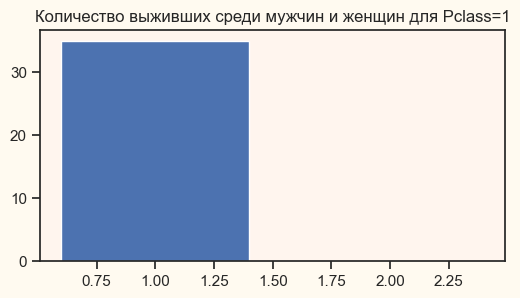

In [17]:
fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=1')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(3)    #  высота Figure

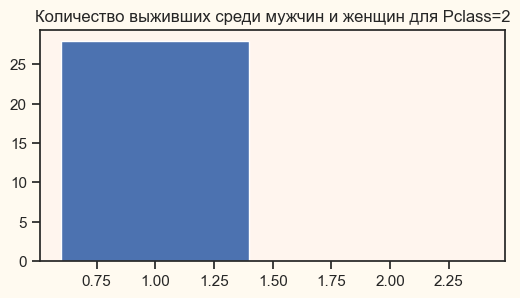

In [18]:
survived_pclass2sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 2.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass2sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 2.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass2sex1.shape[0], survived_pclass2sex2.shape[0]]

fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=2')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(3)    #  высота Figure

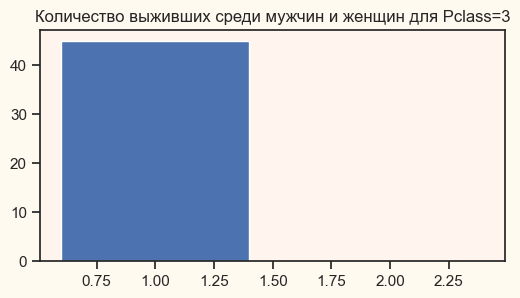

In [19]:
survived_pclass3sex1 = classified_dataset.loc[(classified_dataset["Pclass"] == 3.0) & (classified_dataset["Sex"] == 1.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_pclass3sex2 = classified_dataset.loc[(classified_dataset["Pclass"] == 3.0) & (classified_dataset["Sex"] == 2.0) & (classified_dataset["Survived"] == 1.0), "Survived"]
survived_sex = [survived_pclass3sex1.shape[0], survived_pclass3sex2.shape[0]]

fig, ax = plt.subplots()

ax.bar(sex, survived_sex)

ax.set_facecolor('seashell')
ax.set_title('Количество выживших среди мужчин и женщин для Pclass=3')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(3)    #  высота Figure

### Оценка модели SVM

In [20]:
from sklearn.metrics import confusion_matrix

y_true = data_test[['Survived']]
y_pred = predict_survived
mark = confusion_matrix(y_true, y_pred)
print(mark)

[[151  24]
 [ 36  84]]


In [21]:
print('Число предсказаний из 0 (не спасён) в 0 (не спасён) =', mark[0][0])
print('Число предсказаний из 0 (не спасён) в 1 (спасён) =', mark[0][1])
print('Число предсказаний из 1 (спасён) в 0 (не спасён) =', mark[1][0])
print('Число предсказаний из 1 (спасён) в 1 (спасён) =', mark[1][1])

Число предсказаний из 0 (не спасён) в 0 (не спасён) = 151
Число предсказаний из 0 (не спасён) в 1 (спасён) = 24
Число предсказаний из 1 (спасён) в 0 (не спасён) = 36
Число предсказаний из 1 (спасён) в 1 (спасён) = 84


In [22]:
print('Т.о., число правильных предсказаний =', mark[0][0] + mark[1][1], 'из', data_test[['Survived']].shape[0])

Т.о., число правильных предсказаний = 235 из 295


In [23]:
print('Процент правильных предсказаний =', (mark[0][0] + mark[1][1]) / data_test[['Survived']].shape[0] * 100)

Процент правильных предсказаний = 79.66101694915254
